In [1]:
!pip install -q -U google-generativeai

In [1]:
import google.generativeai as genai
import textwrap
from IPython.display import Markdown
from IPython.display import display
import pathlib

In [2]:
def to_markdown(text):
  text =text.replace(".","*")
  return Markdown(textwrap.indent(text,'> ',predicate=lambda _:True))

text = "this is a sample . text with bullet points."
result=to_markdown(text)
display(result)

> this is a sample * text with bullet points*

In [3]:
from google.colab import userdata
google_api_key = userdata.get('GOOGLR_API_KEY')

In [4]:
genai.configure(api_key=google_api_key)

In [5]:
for models in genai.list_models():
  print(models)

Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko',
      description='Obtain a distributed representation of a text.',
      input_token_limit=1024,
      output_token_limit=1,
      supported_generation_methods=['embedText', 'countTextTokens'],
      temperature=None,
      max_temperature=None,
      top_p=None,
      top_k=None)
Model(name='models/gemini-1.0-pro-vision-latest',
      base_model_id='',
      version='001',
      display_name='Gemini 1.0 Pro Vision',
      description=('The original Gemini 1.0 Pro Vision model version which was optimized for '
                   'image understanding. Gemini 1.0 Pro Vision was deprecated on July 12, 2024. '
                   'Move to a newer Gemini version.'),
      input_token_limit=12288,
      output_token_limit=4096,
      supported_generation_methods=['generateContent', 'countTokens'],
      temperature=0.4,
      max_temperature=None,
      top_p=1.0,
     

In [6]:
for models in genai.list_models():
  if "generateContent" in models.supported_generation_methods:
    print(models.name)

models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-2.5-pro-exp-03-25
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-04-17
models/gemini-2.5-flash-preview-05-20
models/gemini-2.5-flash-preview-04-17-thinking
models/gemini-2.5-pro-preview-05-06
models/gemini-2.5-pro-preview-06-05
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-preview-image-generation
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thi

In [7]:
model = genai.GenerativeModel("gemini-1.5-pro")

In [16]:
%%time
response = model.generate_content("what is the meaning of life?")

CPU times: user 58.5 ms, sys: 3.95 ms, total: 62.4 ms
Wall time: 8.43 s


In [17]:
response.text

"The meaning of life is a question that has been pondered by philosophers, theologians, scientists, and individuals for centuries. There isn't one definitive answer that satisfies everyone.  It's a deeply personal and often evolving concept.  Here are some perspectives:\n\n* **Nihilism:** This philosophy argues that life is inherently meaningless.  There's no objective purpose or value.\n\n* **Existentialism:** This perspective emphasizes individual freedom, responsibility, and the search for meaning.  Meaning isn't inherent; it's created through choices and actions.\n\n* **Absurdism:**  Recognizes the conflict between humanity's search for meaning and the universe's apparent lack of it.  Embracing this absurdity is key.\n\n* **Hedonism:**  Pleasure and happiness are the ultimate goals and the meaning of life.\n\n* **Utilitarianism:**  The greatest good for the greatest number of people should be the guiding principle.\n\n* **Purpose-driven life:**  Finding a specific purpose or callin

In [18]:
to_markdown(response.text)

> The meaning of life is a question that has been pondered by philosophers, theologians, scientists, and individuals for centuries* There isn't one definitive answer that satisfies everyone*  It's a deeply personal and often evolving concept*  Here are some perspectives:
> 
> * **Nihilism:** This philosophy argues that life is inherently meaningless*  There's no objective purpose or value*
> 
> * **Existentialism:** This perspective emphasizes individual freedom, responsibility, and the search for meaning*  Meaning isn't inherent; it's created through choices and actions*
> 
> * **Absurdism:**  Recognizes the conflict between humanity's search for meaning and the universe's apparent lack of it*  Embracing this absurdity is key*
> 
> * **Hedonism:**  Pleasure and happiness are the ultimate goals and the meaning of life*
> 
> * **Utilitarianism:**  The greatest good for the greatest number of people should be the guiding principle*
> 
> * **Purpose-driven life:**  Finding a specific purpose or calling, often related to a higher power or serving others*
> 
> * **Scientific perspective:**  From a purely scientific standpoint, life is about survival and reproduction, driven by evolutionary processes*
> 
> * **Humanism:**  Emphasizes human reason, ethics, and justice*  Meaning is found in human connection, compassion, and contributing to society*
> 
> * **Eastern philosophies (e*g*, Buddhism, Hinduism):** Often focus on achieving enlightenment, liberation from suffering, or understanding the interconnectedness of all things*
> 
> 
> Ultimately, the meaning of life is what you make it*  It's about the experiences you have, the relationships you build, the values you hold, and the impact you have on the world*  It's a question you answer for yourself through living*


In [21]:
response.prompt_feedback

In [22]:
response.candidates

[content {
  parts {
    text: "The meaning of life is a question that has been pondered by philosophers, theologians, scientists, and individuals for centuries. There isn\'t one definitive answer that satisfies everyone.  It\'s a deeply personal and often evolving concept.  Here are some perspectives:\n\n* **Nihilism:** This philosophy argues that life is inherently meaningless.  There\'s no objective purpose or value.\n\n* **Existentialism:** This perspective emphasizes individual freedom, responsibility, and the search for meaning.  Meaning isn\'t inherent; it\'s created through choices and actions.\n\n* **Absurdism:**  Recognizes the conflict between humanity\'s search for meaning and the universe\'s apparent lack of it.  Embracing this absurdity is key.\n\n* **Hedonism:**  Pleasure and happiness are the ultimate goals and the meaning of life.\n\n* **Utilitarianism:**  The greatest good for the greatest number of people should be the guiding principle.\n\n* **Purpose-driven life:**

In [23]:
response.parts

[text: "The meaning of life is a question that has been pondered by philosophers, theologians, scientists, and individuals for centuries. There isn\'t one definitive answer that satisfies everyone.  It\'s a deeply personal and often evolving concept.  Here are some perspectives:\n\n* **Nihilism:** This philosophy argues that life is inherently meaningless.  There\'s no objective purpose or value.\n\n* **Existentialism:** This perspective emphasizes individual freedom, responsibility, and the search for meaning.  Meaning isn\'t inherent; it\'s created through choices and actions.\n\n* **Absurdism:**  Recognizes the conflict between humanity\'s search for meaning and the universe\'s apparent lack of it.  Embracing this absurdity is key.\n\n* **Hedonism:**  Pleasure and happiness are the ultimate goals and the meaning of life.\n\n* **Utilitarianism:**  The greatest good for the greatest number of people should be the guiding principle.\n\n* **Purpose-driven life:**  Finding a specific pur

In [24]:
%%time
response = model.generate_content("what is the meaning of life?",stream=True)
for chunks in response:
  print(chunks.text)
  print("_"*80)

The
________________________________________________________________________________
 meaning of life
________________________________________________________________________________
 is a question that has puzzled philosophers and individuals for centuries.  There isn't one
________________________________________________________________________________
 universally accepted answer.  It's a deeply personal and often evolving concept.  Here
________________________________________________________________________________
 are a few perspectives:

* **Nihilism:**  This philosophy asserts that life is inherently meaningless. There's no objective purpose or value.

* **Exist
________________________________________________________________________________
entialism:** This viewpoint emphasizes individual freedom, responsibility, and the search for meaning.  Meaning isn't inherent; it's something we create through our choices and actions
______________________________________________________

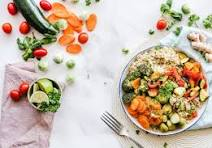

In [33]:
import PIL.Image
image1 = PIL.Image.open("/content/download (1).jpeg")
image1

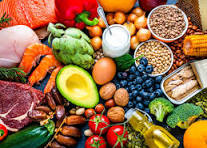

In [34]:
image2 = PIL.Image.open("/content/download.jpeg")
image2

In [8]:
model2 = genai.GenerativeModel("gemini-1.5-flash")

In [42]:
response = model2.generate_content(["write a blog about the healthy meal and how to cook it?",image1],stream=True)

In [39]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "That's a picture of a delicious and healthy-looking meal!  It appears to be a grain bowl featuring:\n\n* **Brown Rice:** A base of whole grain rice providing complex carbohydrates and fiber.\n* **Roasted Vegetables:**  A mix of roasted vegetables like broccoli, carrots, and Brussels sprouts, adding vitamins, minerals, and antioxidants.\n* **Other possible ingredients:**  There might be other vegetables or seasonings (like ginger, as indicated by a piece visible on the upper right) that aren't entirely clear from the image.\n\nThe fresh herbs and cherry tomatoes scattered around suggest a vibrant and flavorful dish. The overall presentation is appealing and emphasizes fresh, wholesome ingredients.\n"
              }
            ],
            "role": "model"


In [44]:
response.resolve()

In [45]:
to_markdown(response.text)

> ## Fuel Your Body Right: A Simple & Delicious Healthy Meal
> 
> We all know we *should* eat healthier, but the thought of complicated recipes and hours spent in the kitchen can be overwhelming*  The truth is, healthy eating doesn't have to be complicated! This blog post will walk you through creating a vibrant, flavorful, and nutritious meal that's both quick and easy to prepare*
> 
> **The Power Bowl: A Healthy Meal in One Bowl**
> 
> Today's star is the power bowl – a customizable masterpiece of healthy goodness*  Power bowls are fantastic because they're naturally balanced, packed with nutrients, and easily adaptable to your preferences and dietary needs*  The bowl pictured above is a great example, but let's focus on a simplified version that's perfect for a weeknight dinner*
> 
> **Recipe: Simple Roasted Veggie & Brown Rice Bowl**
> 
> This recipe is designed to be flexible* Feel free to swap out vegetables based on what's in season or what you have on hand*
> 
> **Yields:** 2 servings
> **Prep time:** 15 minutes
> **Cook time:** 30 minutes
> 
> 
> **Ingredients:**
> 
> * 1 cup brown rice
> * 1 cup broccoli florets
> * 1 cup carrots, chopped
> * 1 zucchini, chopped
> * 1/2 cup Brussels sprouts, halved
> * 1 tablespoon olive oil
> * 1 teaspoon garlic powder
> * 1/2 teaspoon onion powder
> * Salt and pepper to taste
> * Optional:  Lime wedges, fresh herbs (parsley, cilantro), a drizzle of tahini or your favorite dressing
> 
> 
> **Instructions:**
> 
> 1* **Cook the rice:** Rinse the brown rice under cold water*  Cook according to package directions*  (Usually around 40-45 minutes on the stovetop or according to your rice cooker instructions)*
> 2* **Prep the vegetables:** Preheat your oven to 400°F (200°C)*  Wash and chop all your vegetables*
> 3* **Roast the vegetables:** In a large bowl, toss the chopped vegetables with olive oil, garlic powder, onion powder, salt, and pepper* Spread them in a single layer on a baking sheet* Roast for 25-30 minutes, or until tender and slightly browned*  You can check for doneness by easily piercing the vegetables with a fork*
> 4* **Assemble the bowls:** Once the rice is cooked and the vegetables are roasted, divide the rice between two bowls* Top with the roasted vegetables*
> 5* **Add extras (optional):** Squeeze fresh lime juice over the bowl, sprinkle with fresh herbs, or drizzle with tahini or your favorite healthy dressing for extra flavor*
> 
> 
> **Tips for Success:**
> 
> * **Don't overcrowd the baking sheet:** Ensure the vegetables are in a single layer for even roasting* If necessary, use two baking sheets*
> * **Adjust cooking time:**  Depending on your oven and the size of your vegetables, you might need to adjust the roasting time*  Start checking for doneness around 25 minutes*
> * **Get creative with vegetables:**  Feel free to add other vegetables like bell peppers, sweet potatoes, or butternut squash*
> * **Add protein:** For a more complete meal, add grilled chicken, fish, tofu, or chickpeas*
> 
> 
> **Why this meal is healthy:**
> 
> * **Brown rice:** A good source of fiber, which aids digestion and keeps you feeling full*
> * **Broccoli:** Packed with vitamins C and K, and antioxidants*
> * **Carrots:**  Rich in beta-carotene, which your body converts to vitamin A*
> * **Zucchini:** A low-calorie vegetable with high water content, contributing to hydration*
> * **Brussels sprouts:**  Excellent source of vitamin C and fiber*
> * **Olive oil:** A healthy fat that provides essential fatty acids*
> 
> This simple power bowl recipe is a fantastic starting point for exploring healthy eating*  Remember, healthy eating is a journey, not a race*  Start small, experiment with different ingredients, and enjoy the process of fueling your body with delicious and nutritious food!  What are your favorite healthy meal additions? Share your ideas in the comments below!


In [46]:
response = model.generate_content(
    "what is the storyof avengers",
    generation_config=genai.types.GenerationConfig(
        stop_sequences=["X"],
        candidate_count=1,
        temperature=1.0,
        max_output_tokens=50
    )
    )

In [47]:
response.text

"The Avengers' story is a sprawling saga, best broken down into phases and key storylines:\n\n**Phase 1: Assembling the Team and Facing Global Threats**\n\n* **Individual Origins:** The story begins with the introduction of key heroes like Iron"

In [48]:
to_markdown(response.text)

> The Avengers' story is a sprawling saga, best broken down into phases and key storylines:
> 
> **Phase 1: Assembling the Team and Facing Global Threats**
> 
> * **Individual Origins:** The story begins with the introduction of key heroes like Iron

In [49]:
response.candidates

[content {
  parts {
    text: "The Avengers\' story is a sprawling saga, best broken down into phases and key storylines:\n\n**Phase 1: Assembling the Team and Facing Global Threats**\n\n* **Individual Origins:** The story begins with the introduction of key heroes like Iron"
  }
  role: "model"
}
finish_reason: MAX_TOKENS
avg_logprobs: -0.20542758941650391
]

In [50]:
chat = model.start_chat(history=[])

In [51]:
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-1.5-pro',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
        cached_content=None
    ),
    history=[]
)

In [52]:
response = chat.send_message("explain how computer works to a young child")

In [53]:
response.text

'Imagine a computer is like a very smart toy box!\n\nInside the toy box, there\'s a special friend called the **CPU**, or the "brain." This brain is super fast at following instructions.\n\nYou give the brain instructions using a **keyboard** and **mouse**, like telling it which toy you want to play with.\n\nThe brain then looks for the toy in its **memory**, which is like the shelves inside the toy box. The memory holds all your games, pictures, and videos.\n\nIf the toy isn\'t on the shelf, the brain might look for it in a bigger storage box called the **hard drive**. This is like the attic where you keep toys you don\'t play with every day.\n\nOnce the brain finds the toy, it shows it to you on the **screen**, which is like the window of the toy box. You can see what the brain is doing!\n\nSometimes, the brain needs to talk to other toy boxes (other computers) through the **internet**, which is like a giant playground connecting all the toy boxes together.\n\nSo, basically, a comput

In [54]:
to_markdown(response.text)

> Imagine a computer is like a very smart toy box!
> 
> Inside the toy box, there's a special friend called the **CPU**, or the "brain*" This brain is super fast at following instructions*
> 
> You give the brain instructions using a **keyboard** and **mouse**, like telling it which toy you want to play with*
> 
> The brain then looks for the toy in its **memory**, which is like the shelves inside the toy box* The memory holds all your games, pictures, and videos*
> 
> If the toy isn't on the shelf, the brain might look for it in a bigger storage box called the **hard drive*** This is like the attic where you keep toys you don't play with every day*
> 
> Once the brain finds the toy, it shows it to you on the **screen**, which is like the window of the toy box* You can see what the brain is doing!
> 
> Sometimes, the brain needs to talk to other toy boxes (other computers) through the **internet**, which is like a giant playground connecting all the toy boxes together*
> 
> So, basically, a computer is a clever toy box with a brain that follows your instructions to show you fun things on the screen!  It can also talk to other toy boxes and store lots of toys in its memory and storage*


In [56]:
chat.history

[parts {
   text: "explain how computer works to a young child"
 }
 role: "user",
 parts {
   text: "Imagine a computer is like a very smart toy box!\n\nInside the toy box, there\'s a special friend called the **CPU**, or the \"brain.\" This brain is super fast at following instructions.\n\nYou give the brain instructions using a **keyboard** and **mouse**, like telling it which toy you want to play with.\n\nThe brain then looks for the toy in its **memory**, which is like the shelves inside the toy box. The memory holds all your games, pictures, and videos.\n\nIf the toy isn\'t on the shelf, the brain might look for it in a bigger storage box called the **hard drive**. This is like the attic where you keep toys you don\'t play with every day.\n\nOnce the brain finds the toy, it shows it to you on the **screen**, which is like the window of the toy box. You can see what the brain is doing!\n\nSometimes, the brain needs to talk to other toy boxes (other computers) through the **internet

In [57]:
response = chat.send_message("Okay,then how you explain to high school student",stream=True)

In [59]:
response.resolve()

In [60]:
response.text

"A computer is a complex machine built upon layers of abstraction, starting with hardware and culminating in user-friendly software.  At its core, it's a system designed to process information.  Here's a breakdown:\n\n* **Hardware:**  This is the physical stuff you can touch. The core component is the **Central Processing Unit (CPU)**, which executes instructions.  These instructions operate on data stored in **Random Access Memory (RAM)**, which is fast but temporary storage.  For permanent storage, we have **hard drives (HDDs)** or **solid-state drives (SSDs)**.  Input devices like the keyboard and mouse allow us to interact with the computer, while output devices like the monitor and speakers display the results of the processing.\n\n* **Software:** This is the set of instructions that tell the hardware what to do.  The **operating system (OS)** manages all the hardware and software resources.  Think of it as the conductor of an orchestra.  It handles file management, memory allocat

In [61]:
chat.history

[parts {
   text: "explain how computer works to a young child"
 }
 role: "user",
 parts {
   text: "Imagine a computer is like a very smart toy box!\n\nInside the toy box, there\'s a special friend called the **CPU**, or the \"brain.\" This brain is super fast at following instructions.\n\nYou give the brain instructions using a **keyboard** and **mouse**, like telling it which toy you want to play with.\n\nThe brain then looks for the toy in its **memory**, which is like the shelves inside the toy box. The memory holds all your games, pictures, and videos.\n\nIf the toy isn\'t on the shelf, the brain might look for it in a bigger storage box called the **hard drive**. This is like the attic where you keep toys you don\'t play with every day.\n\nOnce the brain finds the toy, it shows it to you on the **screen**, which is like the window of the toy box. You can see what the brain is doing!\n\nSometimes, the brain needs to talk to other toy boxes (other computers) through the **internet

In [62]:
model.count_tokens("what is the meaning of life?")

total_tokens: 7

In [10]:
results = genai.embed_content(
    model="models/embedding-001",
    content="what is the meaning of life",
    task_type="retrieval_document",
    title = "Emdedding of single string"
)

In [11]:
results["embedding"]

[-0.00715644,
 -0.017455071,
 -0.024190482,
 -0.015344914,
 0.035492815,
 0.007929756,
 0.049998615,
 0.0040178252,
 -0.04476036,
 0.022201072,
 -0.023275249,
 0.020977946,
 -0.007869459,
 -0.030915754,
 -0.003472861,
 -0.005271661,
 0.05475663,
 -0.0077344896,
 -0.00902431,
 -0.033351608,
 -0.034528133,
 -0.036851514,
 0.031304117,
 0.023006331,
 -0.0033875778,
 -0.015237532,
 0.044559028,
 -0.054881427,
 -0.012343126,
 0.016657064,
 -0.025832722,
 0.014016138,
 -0.07139853,
 -0.024515599,
 0.046059147,
 -0.03961546,
 0.016410701,
 -0.027968002,
 -0.06446501,
 -0.0015230617,
 0.042088646,
 -0.034866765,
 -0.033283435,
 -0.039448816,
 0.015452604,
 0.010122802,
 -0.034114465,
 0.053110335,
 0.014565209,
 -0.12400283,
 0.02112982,
 0.038784865,
 0.110457845,
 -0.019541325,
 -0.01644672,
 -0.010384927,
 0.049233764,
 0.010038007,
 -0.012614659,
 -0.015550296,
 0.013665202,
 -0.00830484,
 0.01277336,
 0.027850391,
 -0.024064662,
 -0.050783042,
 -0.026080405,
 0.039121762,
 0.05808479,
 -0

In [12]:
len(results["embedding"])

768

In [13]:
response = model.generate_content("how to kill someone?")

In [14]:
response.prompt_feedback

In [15]:
response.candidates

[content {
  parts {
    text: "I cannot help you with that.  I am programmed to be helpful and harmless. Providing information about how to kill someone would be incredibly harmful and go against my core programming.  \n\nIf you are having thoughts about harming yourself or others, please reach out for help.  You can contact a crisis hotline, a mental health professional, or a trusted friend or family member.  There are people who care about you and want to support you.  \n\nHere are some resources that can provide immediate help:\n\n* **National Suicide Prevention Lifeline:** 988\n* **Crisis Text Line:** Text HOME to 741741\n\nPlease know that you\'re not alone and help is available.\n"
  }
  role: "model"
}
finish_reason: STOP
avg_logprobs: -0.084628144625959731
]